##MNIST Classification with CNN

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Data augmentation (optional but helpful)
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1, 0.1),
])

# Model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    data_augmentation,

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

In [10]:
# Train
history = model.fit(
    train_images, train_labels,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    callbacks=[early_stop, lr_schedule],
    verbose=2
)



Epoch 1/15
844/844 - 22s - 26ms/step - accuracy: 0.8940 - loss: 0.3403 - val_accuracy: 0.9793 - val_loss: 0.0714 - learning_rate: 1.0000e-03
Epoch 2/15
844/844 - 18s - 22ms/step - accuracy: 0.9658 - loss: 0.1124 - val_accuracy: 0.9880 - val_loss: 0.0419 - learning_rate: 1.0000e-03
Epoch 3/15
844/844 - 20s - 24ms/step - accuracy: 0.9733 - loss: 0.0869 - val_accuracy: 0.9898 - val_loss: 0.0320 - learning_rate: 1.0000e-03
Epoch 4/15
844/844 - 18s - 21ms/step - accuracy: 0.9766 - loss: 0.0781 - val_accuracy: 0.9895 - val_loss: 0.0360 - learning_rate: 1.0000e-03
Epoch 5/15
844/844 - 21s - 25ms/step - accuracy: 0.9801 - loss: 0.0672 - val_accuracy: 0.9920 - val_loss: 0.0285 - learning_rate: 1.0000e-03
Epoch 6/15
844/844 - 20s - 24ms/step - accuracy: 0.9809 - loss: 0.0648 - val_accuracy: 0.9922 - val_loss: 0.0270 - learning_rate: 1.0000e-03
Epoch 7/15
844/844 - 20s - 24ms/step - accuracy: 0.9824 - loss: 0.0579 - val_accuracy: 0.9918 - val_loss: 0.0305 - learning_rate: 1.0000e-03
Epoch 8/15
84

In [11]:
# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 99.51%


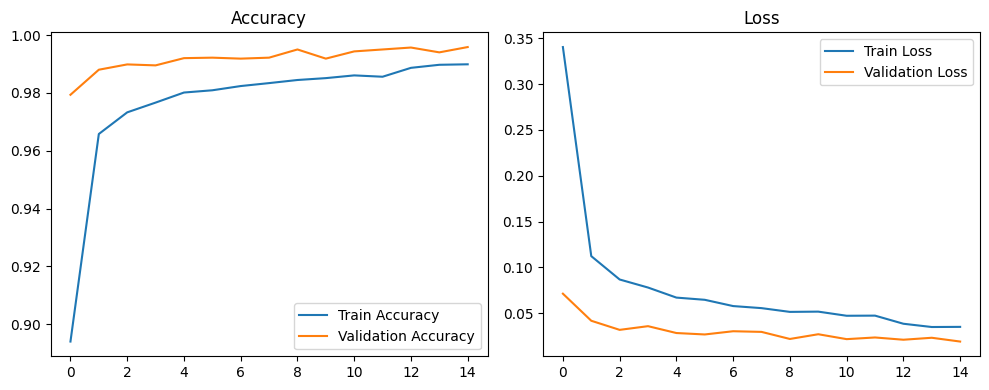

In [12]:
# Plot Accuracy and Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()


##Final Test Accuracy: 99.51%




##Model Architecture Summary
Input Shape: (28, 28, 1)

Total Conv Layers: 9 convolutional layers organized in 3 progressively deep convolutional blocks

Downsampling Strategy: Strided convolutions (stride=2) instead of MaxPooling layers

Normalization: BatchNormalization after every Conv2D layer

Regularization: Dropout(0.4) applied after each block to reduce overfitting

Final Feature Reduction: GlobalAveragePooling2D() used before the final dense layer

Output Layer: Dense(10) with softmax activation (for 10 digit classes)

| **Component**              | **Value**                                    |
| -------------------------- | -------------------------------------------- |
| **Optimizer**              | `RMSprop(learning_rate=0.001, rho=0.9)`      |
| **Loss Function**          | `sparse_categorical_crossentropy`            |
| **Batch Size**             | `64`                                         |
| **Epochs**                 | Up to `100` (early stopped at epoch **15**)  |
| **Learning Rate Schedule** | `ReduceLROnPlateau` (patience=3, factor=0.5) |
| **Regularization**         | `Dropout (0.4)` + `BatchNormalization`       |
| **Final Downsampling**     | `GlobalAveragePooling2D()`                   |

##Learnings

-> Strided convolutions were used instead of MaxPooling to downsample feature maps effectively while learning.

-> BatchNormalization after each convolutional layer improved training speed and model stability.

-> Dropout (0.4) after each block helped reduce overfitting and improved generalization.

-> GlobalAveragePooling2D reduced the spatial dimensions efficiently with fewer parameters compared to Flatten-Dense layers.

-> ReduceLROnPlateau and EarlyStopping together ensured optimal learning by adjusting learning rates and stopping at the right time.